In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('merged_files.csv')
df.head()

,Price,Area,Location,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,Bangalore,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,Bangalore,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,Bangalore,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,Bangalore,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,Bangalore,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Price', 'Area', 'Location', 'City', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [ ]:
import pandas as pd
for col in df.columns:
    dtype = df[col].dtype
    sample_value = df[col].dropna().iloc[0] if df[col].dropna().shape[0] > 0 else 'NaN'
    print(f"Column: {col}\nData Type: {dtype}\nSample Value: {sample_value}\n")

Column: Price
Data Type: int64
Sample Value: 30000000

Column: Area
Data Type: int64
Sample Value: 3340

Column: Location
Data Type: object
Sample Value: JP Nagar Phase 1

Column: City
Data Type: object
Sample Value: Bangalore

Column: No. of Bedrooms
Data Type: int64
Sample Value: 4

Column: Resale
Data Type: int64
Sample Value: 0

Column: MaintenanceStaff
Data Type: int64
Sample Value: 1

Column: Gymnasium
Data Type: int64
Sample Value: 1

Column: SwimmingPool
Data Type: int64
Sample Value: 1

Column: LandscapedGardens
Data Type: int64
Sample Value: 1

Column: JoggingTrack
Data Type: int64
Sample Value: 1

Column: RainWaterHarvesting
Data Type: int64
Sample Value: 1

Column: IndoorGames
Data Type: int64
Sample Value: 1

Column: ShoppingMall
Data Type: int64
Sample Value: 0

Column: Intercom
Data Type: int64
Sample Value: 1

Column: SportsFacility
Data Type: int64
Sample Value: 1

Column: ATM
Data Type: int64
Sample Value: 0

Column: ClubHouse
Data Type: int64
Sample Value: 1

Column:

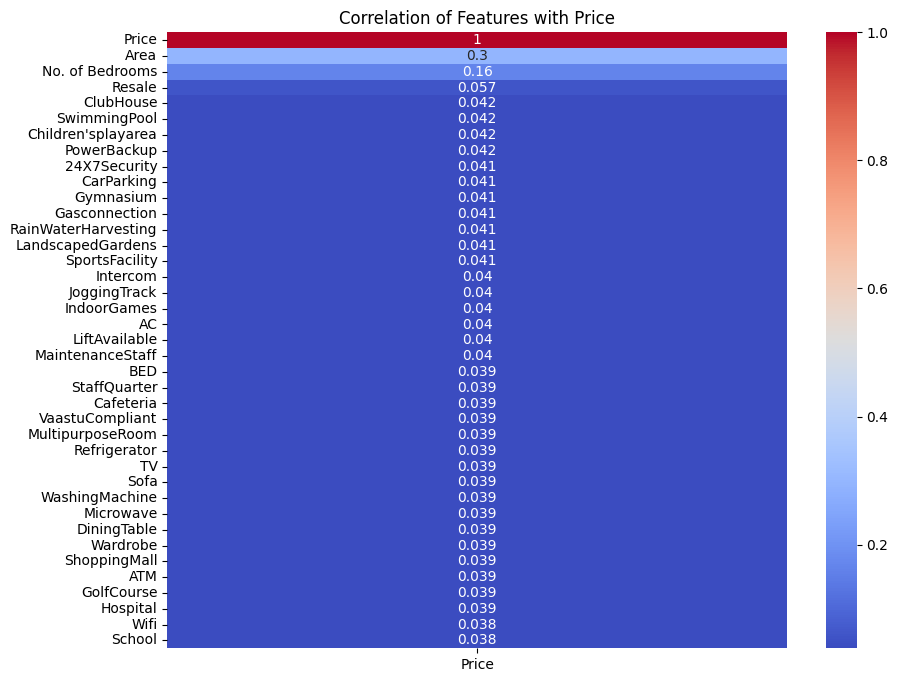

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Price')
plt.show()


Top 10 Important Features:
 Area                          0.376701
No. of Bedrooms               0.049362
Location_Sunder Nagar         0.049069
Location_Greater Kailash      0.037047
Location_Vasant Kunj          0.034319
Resale                        0.024837
Location_Karampura            0.023812
Location_Mansarovar garden    0.017893
Location_Sector 4 Dwarka      0.016132
Location_Shivalik             0.013469
dtype: float64


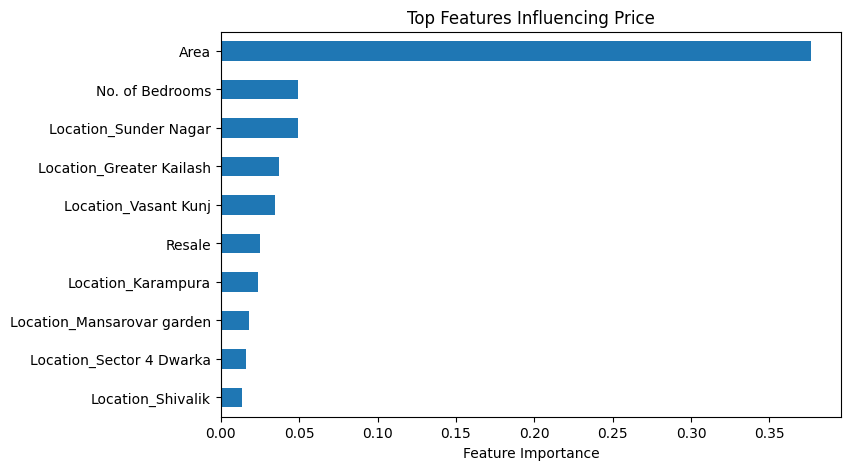

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis=1)
y = df['Price']

X = pd.get_dummies(X)  # In case 'Location' or 'City' are included
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False)

print("Top 10 Important Features:\n", important_features.head(10))
important_features.head(10).plot(kind='barh', figsize=(8, 5))
plt.xlabel("Feature Importance")
plt.title("Top Features Influencing Price")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="housing_geocoder")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

df['full_address'] = df['Location'] + ", " + df['City']

df['location_latlon'] = df['full_address'].apply(geocode)
df['latitude'] = df['location_latlon'].apply(lambda loc: loc.latitude if loc else None)
df['longitude'] = df['location_latlon'].apply(lambda loc: loc.longitude if loc else None)

df = df.drop(['Location', 'City', 'full_address', 'location_latlon'], axis=1)

print(df[['latitude', 'longitude']].head())


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line

KeyboardInterrupt: 

#new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                32963 non-null  int64 
 1   Area                 32963 non-null  int64 
 2   City                 32963 non-null  object
 3   No. of Bedrooms      32963 non-null  int64 
 4   Resale               32963 non-null  int64 
 5   MaintenanceStaff     32963 non-null  int64 
 6   Gymnasium            32963 non-null  int64 
 7   SwimmingPool         32963 non-null  int64 
 8   LandscapedGardens    32963 non-null  int64 
 9   JoggingTrack         32963 non-null  int64 
 10  RainWaterHarvesting  32963 non-null  int64 
 11  IndoorGames          32963 non-null  int64 
 12  ShoppingMall         32963 non-null  int64 
 13  Intercom             32963 non-null  int64 
 14  SportsFacility       32963 non-null  int64 
 15  ATM                  32963 non-null  int64 
 16  Club

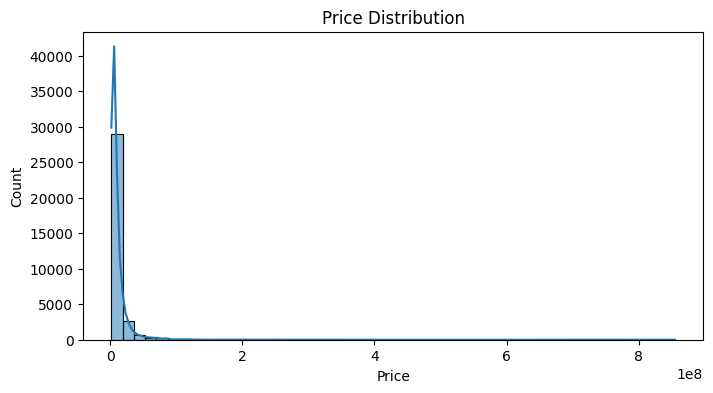

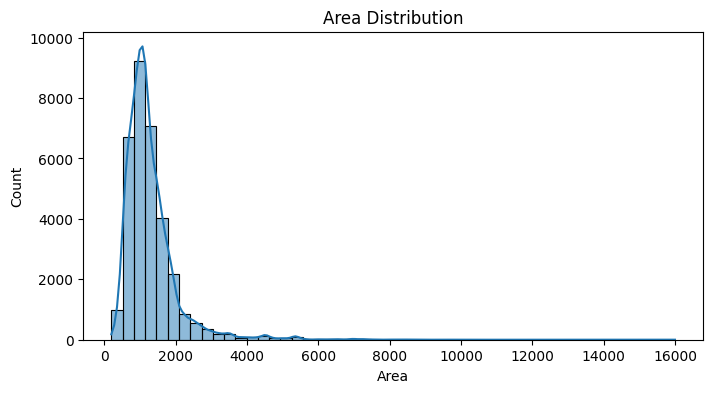

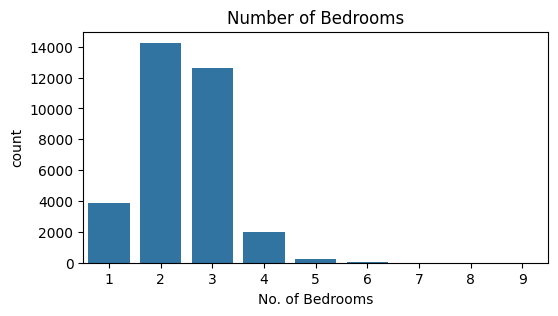

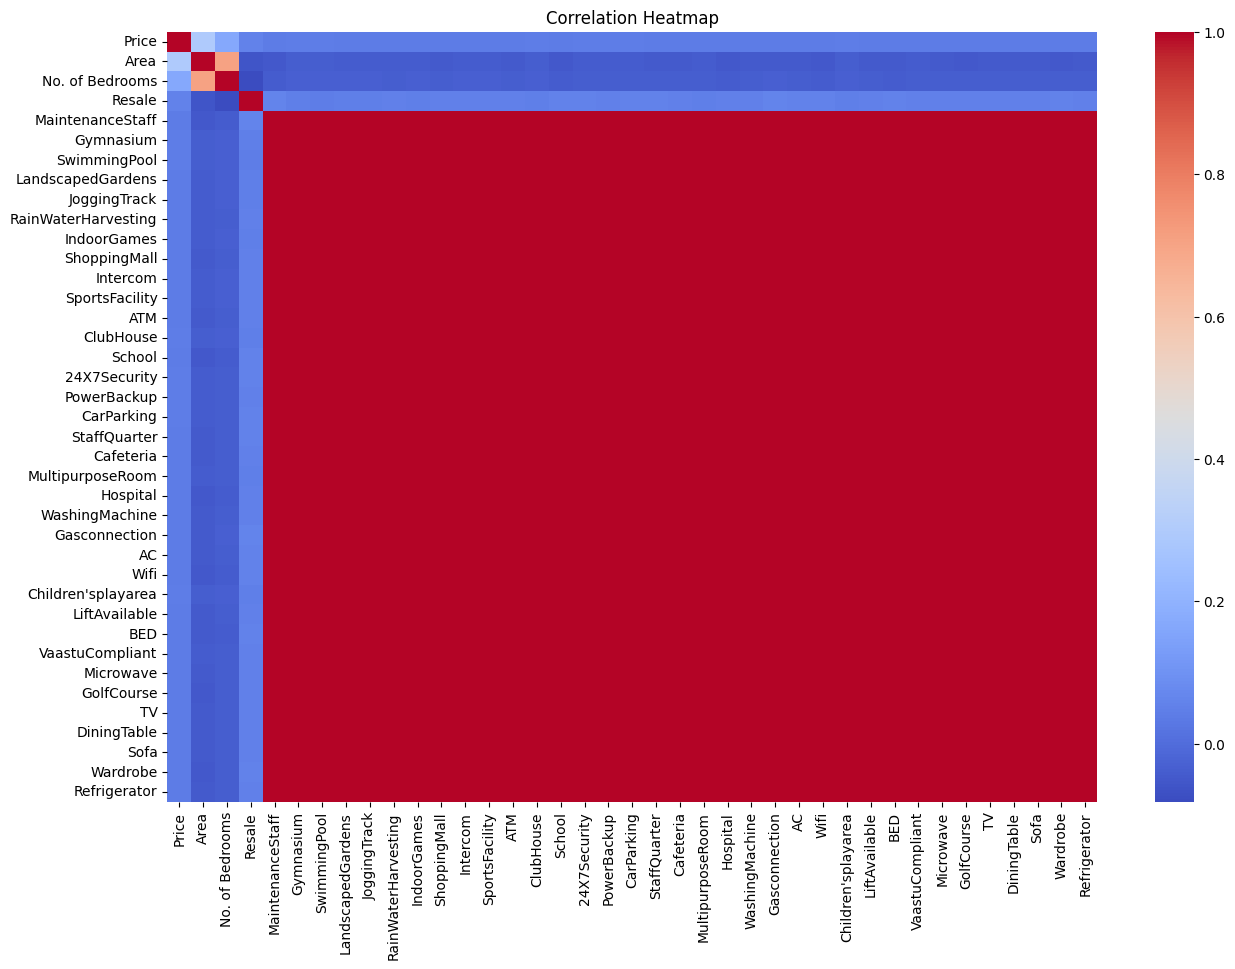

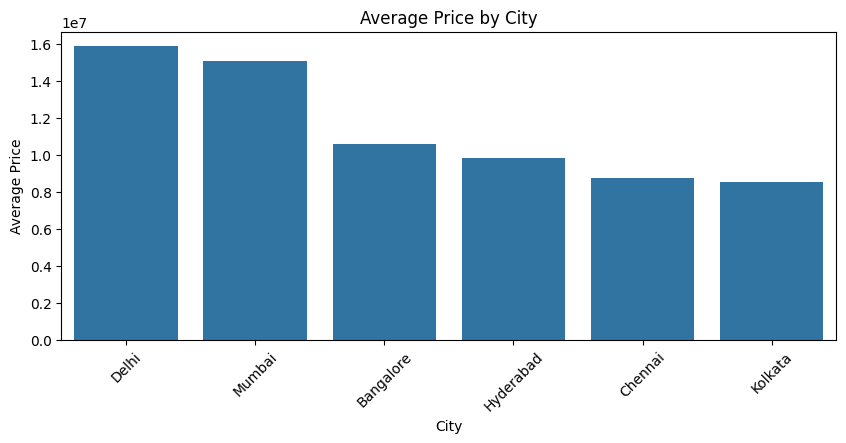

Preprocessing complete. Feature matrix shape: (32963, 44)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv("merged_files.csv")

df = df.drop(columns=["Location"])

print(df.info())
print(df.describe())

print("Missing values:\n", df.isnull().sum())

plt.figure(figsize=(8,4))
sns.histplot(df["Price"], kde=True, bins=50)
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df["Area"], kde=True, bins=50)
plt.title("Area Distribution")
plt.show()

plt.figure(figsize=(6,3))
sns.countplot(x="No. of Bedrooms", data=df)
plt.title("Number of Bedrooms")
plt.show()

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(10,4))
city_avg = df.groupby("City")["Price"].mean().sort_values(ascending=False)
sns.barplot(x=city_avg.index, y=city_avg.values)
plt.xticks(rotation=45)
plt.title("Average Price by City")
plt.ylabel("Average Price")
plt.show()

X = df.drop(columns=["Price"])
y = df["Price"]

categorical_cols = ["City"]
numerical_cols = ["Area", "No. of Bedrooms"]
binary_cols = [col for col in X.columns if col not in categorical_cols + numerical_cols]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("bin", "passthrough", binary_cols)
])

X_processed = preprocessor.fit_transform(X)

print("Preprocessing complete. Feature matrix shape:", X_processed.shape)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.824e+17, tolerance: 1.394e+15
  model = cd_fast.enet_coordinate_descent(


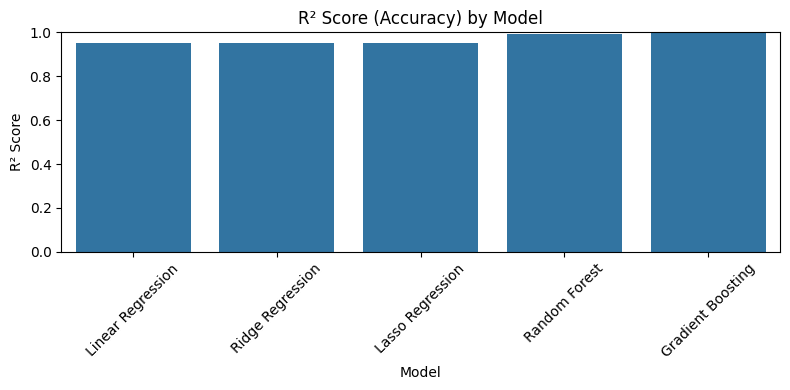

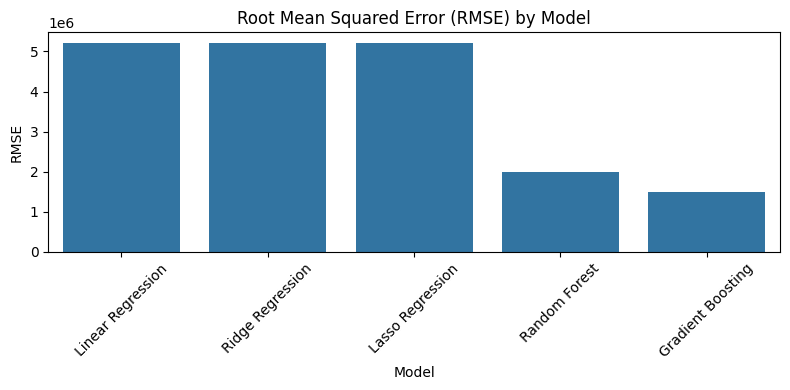

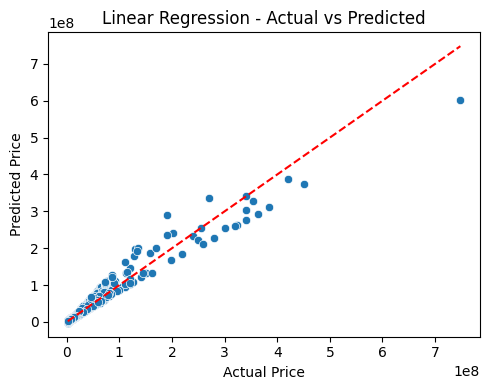

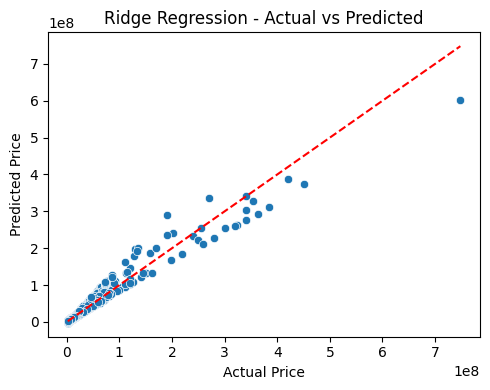

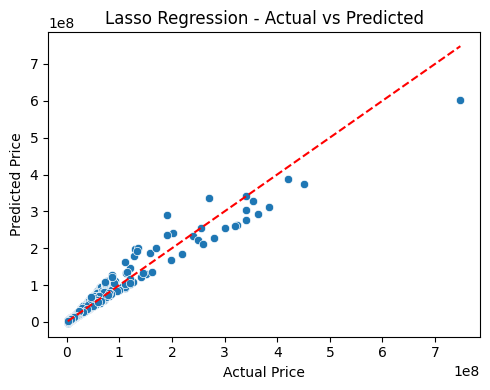

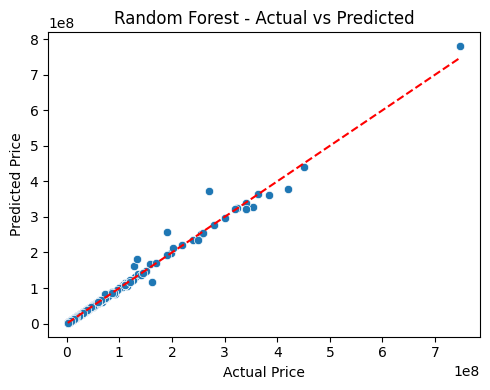

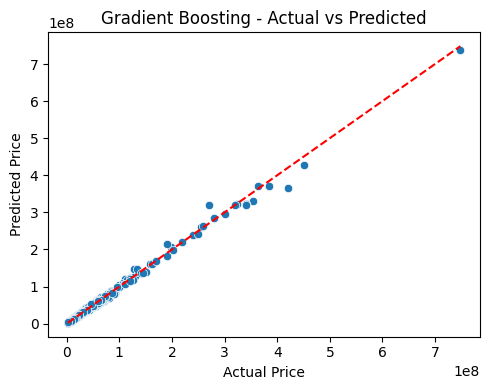

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare data
df = pd.read_csv("merged_files.csv")
df = df.drop(columns=["Location"])

# Feature Engineering
df["Price_per_sqft"] = df["Price"] / df["Area"]
df["IsLuxuryProperty"] = ((df["Area"] > 2000) | (df["Price"] > 1e7)).astype(int)
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col not in ["Resale", "IsLuxuryProperty"]]
df["AmenityScore"] = df[binary_cols].sum(axis=1)
df["CityPriceRatio"] = df["Price"] / df.groupby("City")["Price"].transform("mean")

# Features & target
X = df.drop(columns=["Price"])
y = df["Price"]

categorical_cols = ["City"]
numerical_cols = ["Area", "No. of Bedrooms", "Price_per_sqft", "AmenityScore", "CityPriceRatio"]
other_cols = [col for col in X.columns if col not in categorical_cols + numerical_cols]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("bin", "passthrough", other_cols)
])

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store results
results = []

for name, reg in models.items():
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("regressor", reg)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "RMSE": rmse, "R2": r2, "y_pred": y_pred})

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Bar Plot - R² Score
plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="R2", data=results_df)
plt.xticks(rotation=45)
plt.title("R² Score (Accuracy) by Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Bar Plot - RMSE
plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.xticks(rotation=45)
plt.title("Root Mean Squared Error (RMSE) by Model")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

# Scatter plots: Actual vs Predicted
for res in results:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=y_test, y=res["y_pred"])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{res['Model']} - Actual vs Predicted")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.tight_layout()
    plt.show()
